In [3]:
import pandas as pd
from sklearn.preprocessing import RobustScaler
import matplotlib.pyplot as plt
import statsmodels.api as sm


data = pd.read_csv("DATA/act_labeling_data_fix.csv",encoding="cp949")

In [1]:
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("DATA/act_labeling_data_fix.csv",encoding="cp949")

NameError: name 'pd' is not defined

In [20]:
scaler_data = data[[ 'CBSCORE', 'CREDITOTAMT', 'YSALEAMT',
       'ESTMM', 'ASSETAMT', 'IMSAAMT', 'IMJUAMT', 'BUSAAMT', 'BUJUAMT',
       'BU1TOTAMT', 'GAMT', 'GKIND', 'LABORCNT', 'ACTCD','KOSPI', '환율', 'GDP', 
       '소상공인체감지수', '실업률', '물가지수', '국고채', '금리', '유가등락률',
       '소비자심리지수']]

In [21]:
scaler = RobustScaler()
#scaler = MinMaxScaler()
scaler = scaler.fit_transform(scaler_data)

In [22]:
data[[ 'CBSCORE', 'CREDITOTAMT', 'YSALEAMT',
       'ESTMM', 'ASSETAMT', 'IMSAAMT', 'IMJUAMT', 'BUSAAMT', 'BUJUAMT',
       'BU1TOTAMT', 'GAMT', 'GKIND', 'LABORCNT', 'ACTCD','KOSPI', '환율', 'GDP', 
       '소상공인체감지수', '실업률', '물가지수', '국고채', '금리', '유가등락률',
       '소비자심리지수']] = scaler

In [7]:
import seaborn as sns

In [23]:
df_bu = data[data["ACTCD"]==1]
df_ju = data[data["ACTCD"]==0]

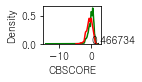

In [24]:
plt.subplot(5,5,1)
sns.kdeplot(data['CBSCORE'],color="green")
sns.kdeplot(df_bu['CBSCORE'],color="red")
CB_mean = round(data['CBSCORE'].mean()- df_bu['CBSCORE'].mean(),6)
plt.text(0.1,0.01,str(CB_mean))
plt.show()

In [12]:
import matplotlib.font_manager as fm

# 설치된 폰트 출력
font_list = [font.name for font in fm.fontManager.ttflist]
plt.rcParams['font.family'] = 'gulim'
print(font_list)

['STIXSizeTwoSym', 'cmtt10', 'STIXGeneral', 'STIXSizeFourSym', 'STIXSizeFourSym', 'cmb10', 'DejaVu Sans', 'STIXSizeThreeSym', 'cmsy10', 'STIXNonUnicode', 'DejaVu Sans Mono', 'cmex10', 'DejaVu Serif', 'DejaVu Sans', 'STIXNonUnicode', 'STIXSizeOneSym', 'STIXSizeOneSym', 'DejaVu Sans', 'cmmi10', 'DejaVu Serif', 'DejaVu Sans Mono', 'DejaVu Serif Display', 'STIXGeneral', 'STIXNonUnicode', 'DejaVu Sans Mono', 'DejaVu Sans Display', 'DejaVu Sans Mono', 'STIXGeneral', 'DejaVu Sans', 'DejaVu Serif', 'STIXSizeTwoSym', 'cmss10', 'STIXNonUnicode', 'STIXGeneral', 'DejaVu Serif', 'STIXSizeFiveSym', 'STIXSizeThreeSym', 'cmr10', 'Leelawadee UI', 'Candara', 'Century Schoolbook', 'Palatino Linotype', 'HYHeadLine-Medium', 'Headline R', 'Agency FB', 'Arial Rounded MT Bold', 'Courier New', 'Showcard Gothic', 'Kristen ITC', 'Segoe UI', 'Constantia', 'Segoe UI', 'Javanese Text', 'Gabriola', 'Malgun Gothic', 'HYPost-Medium', 'MS Outlook', 'Centaur', 'Lucida Handwriting', 'Segoe Script', 'Arial', 'Microsoft Ya

In [13]:
def kdeplot_sub_draw(sub_ax, x, title, size, color, left= 0, right= 0):
    # sns.kdeplot: Fit and plot a univariate or bivariate kernel density estimate
    if left != 0 and right != 0:
        sub_ax.set_xlim(left, right)
    sub_ax.grid(False)
    sub_ax.set_title(title)
    sns.kdeplot(x, ax = sub_ax, shade=True, color=color)
    # median  line draw
    sub_ax.set_xlabel(" ")
    sub_ax.set_ylabel(" ")

In [1]:
df_bu.columns

NameError: name 'df_bu' is not defined

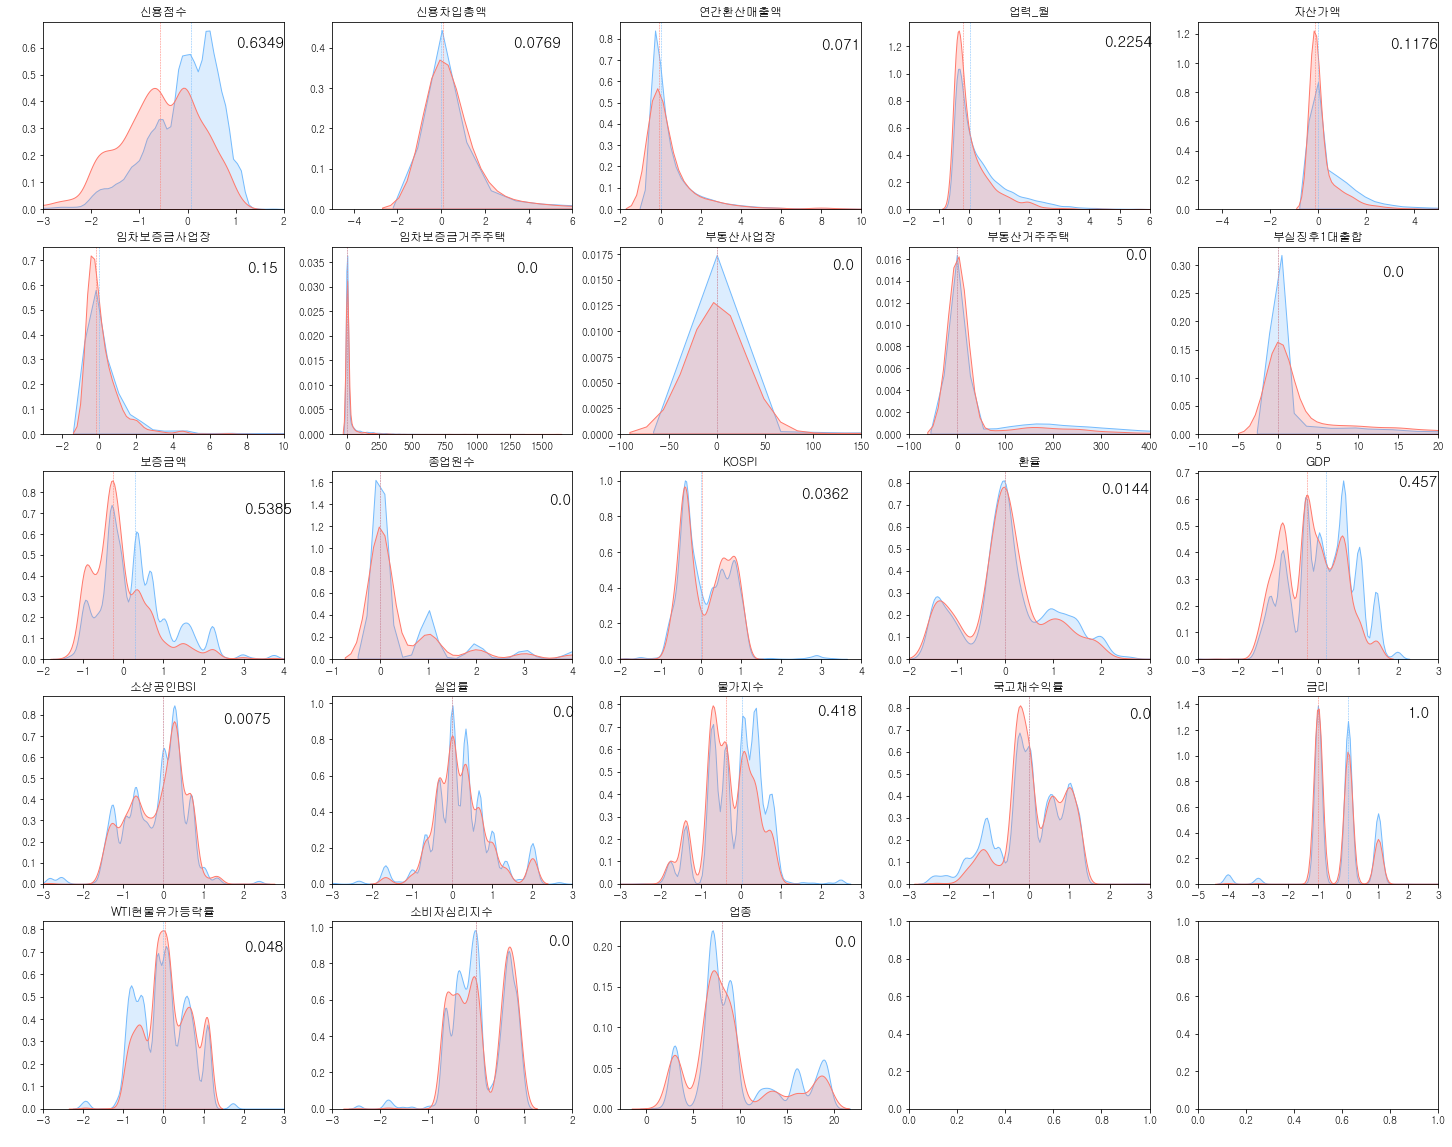

In [15]:
def kdeplot_show(a, b):
    fig, ax = plt.subplots(nrows=5, ncols=5, figsize=(25,20))
    kdeplot_sub_draw(sub_ax=ax[0][0], x=a['CBSCORE'], title='신용점수', size=1, color='xkcd:sky blue',left=-3,right=2)
    ax[0][0].axvline(x=a['CBSCORE'].median(), color='xkcd:sky blue', linestyle='--', linewidth=0.5)
    kdeplot_sub_draw(sub_ax=ax[0][0], x=b['CBSCORE'], title='신용점수', size=1, color='xkcd:salmon',left=-3,right=2)
    ax[0][0].axvline(x=b['CBSCORE'].median(), color='xkcd:salmon', linestyle='--', linewidth=0.5)
    ax[0][0].text(1,0.6,round(a['CBSCORE'].median()-b['CBSCORE'].median(),4),fontsize=15)

    kdeplot_sub_draw(sub_ax=ax[0][1], x=a['CREDITOTAMT'], title='신용차입총액', size=1, color='xkcd:sky blue',left=-5,right=6)
    ax[0][1].axvline(x=a['CREDITOTAMT'].median(), color='xkcd:sky blue', linestyle='--', linewidth=0.5)
    kdeplot_sub_draw(sub_ax=ax[0][1], x=b['CREDITOTAMT'], title='신용차입총액', size=1, color='xkcd:salmon',left=-5,right=6)
    ax[0][1].axvline(x=b['CREDITOTAMT'].median(), color='xkcd:salmon', linestyle='--', linewidth=0.5)
    ax[0][1].text(3.3,0.4,abs(round(a['CREDITOTAMT'].median()-b['CREDITOTAMT'].median(),4)),fontsize=15)


    kdeplot_sub_draw(sub_ax=ax[0][2], x=a['YSALEAMT'], title='연간환산매출액', size=1, color='xkcd:sky blue',left=-2,right=10)
    ax[0][2].axvline(x=a['YSALEAMT'].median(), color='xkcd:sky blue', linestyle='--', linewidth=0.5)
    kdeplot_sub_draw(sub_ax=ax[0][2], x=b['YSALEAMT'], title='연간환산매출액', size=1, color='xkcd:salmon',left=-2,right=10)
    ax[0][2].axvline(x=b['YSALEAMT'].median(), color='xkcd:salmon', linestyle='--', linewidth=0.5)
    ax[0][2].text(8,0.75,abs(round(a['YSALEAMT'].median()-b['YSALEAMT'].median(),4)),fontsize=15)

    kdeplot_sub_draw(sub_ax=ax[0][3], x=a['ESTMM'], title='업력_월', size=1, color='xkcd:sky blue',left=-2,right=6)
    ax[0][3].axvline(x=a['ESTMM'].median(), color='xkcd:sky blue', linestyle='--', linewidth=0.5)
    kdeplot_sub_draw(sub_ax=ax[0][3], x=b['ESTMM'], title='업력_월', size=1, color='xkcd:salmon',left=-2,right=6)
    ax[0][3].axvline(x=b['ESTMM'].median(), color='xkcd:salmon', linestyle='--', linewidth=0.5)
    ax[0][3].text(4.5,1.2,abs(round(a['ESTMM'].median()-b['ESTMM'].median(),4)),fontsize=15)
    
    kdeplot_sub_draw(sub_ax=ax[0][4], x=a['ASSETAMT'], title='자산가액', size=1, color='xkcd:sky blue',left=-5,right=5 )
    ax[0][4].axvline(x=a['ASSETAMT'].median(), color='xkcd:sky blue', linestyle='--', linewidth=0.5)
    kdeplot_sub_draw(sub_ax=ax[0][4], x=b['ASSETAMT'], title='자산가액', size=1, color='xkcd:salmon',left=-5,right=5 )
    ax[0][4].axvline(x=b['ASSETAMT'].median(), color='xkcd:salmon', linestyle='--', linewidth=0.5)
    ax[0][4].text(3,1.1,abs(round(a['ASSETAMT'].median()-b['ASSETAMT'].median(),4)),fontsize=15)
    
    kdeplot_sub_draw(sub_ax=ax[1][0], x=a['IMSAAMT'], title='임차보증금사업장', size=1, color='xkcd:sky blue',left=-3,right=10 )
    ax[1][0].axvline(x=a['IMSAAMT'].median(), color='xkcd:sky blue', linestyle='--', linewidth=0.5)
    kdeplot_sub_draw(sub_ax=ax[1][0], x=b['IMSAAMT'], title='임차보증금사업장', size=1, color='xkcd:salmon',left=-3,right=10 )
    ax[1][0].axvline(x=b['IMSAAMT'].median(), color='xkcd:salmon', linestyle='--', linewidth=0.5)
    ax[1][0].text(8,0.65,abs(round(a['IMSAAMT'].median()-b['IMSAAMT'].median(),4)),fontsize=15)
    
    kdeplot_sub_draw(sub_ax=ax[1][1], x=a['IMJUAMT'], title='임차보증금거주주택', size=1, color='xkcd:sky blue',right=80)
    ax[1][1].axvline(x=a['IMJUAMT'].median(), color='xkcd:sky blue', linestyle='--', linewidth=0.5)
    kdeplot_sub_draw(sub_ax=ax[1][1], x=b['IMJUAMT'], title='임차보증금거주주택', size=1, color='xkcd:salmon',right=80)
    ax[1][1].axvline(x=b['IMJUAMT'].median(), color='xkcd:salmon', linestyle='--', linewidth=0.5)
    ax[1][1].text(1300,0.033,abs(round(a['IMJUAMT'].median()-b['IMJUAMT'].median(),4)),fontsize=15)
    
    kdeplot_sub_draw(sub_ax=ax[1][2], x=a['BUSAAMT'], title='부동산사업장', size=1, color='xkcd:sky blue',left=-100,right=150)
    ax[1][2].axvline(x=a['BUSAAMT'].median(), color='xkcd:sky blue', linestyle='--', linewidth=0.5)
    kdeplot_sub_draw(sub_ax=ax[1][2], x=b['BUSAAMT'], title='부동산사업장', size=1, color='xkcd:salmon',left=-100,right=150)
    ax[1][2].axvline(x=b['BUSAAMT'].median(), color='xkcd:salmon', linestyle='--', linewidth=0.5)
    ax[1][2].text(120,0.016,abs(round(a['BUSAAMT'].median()-b['BUSAAMT'].median(),4)),fontsize=15)
    
    kdeplot_sub_draw(sub_ax=ax[1][3], x=a['BUJUAMT'], title='부동산거주주택', size=1, color='xkcd:sky blue',left=-100,right=400 )
    ax[1][3].axvline(x=a['BUJUAMT'].median(), color='xkcd:sky blue', linestyle='--', linewidth=0.5)
    kdeplot_sub_draw(sub_ax=ax[1][3], x=b['BUJUAMT'], title='부동산거주주택', size=1, color='xkcd:salmon',left=-100,right=400 )
    ax[1][3].axvline(x=b['BUJUAMT'].median(), color='xkcd:salmon', linestyle='--', linewidth=0.5)
    ax[1][3].text(350,0.016,abs(round(a['BUJUAMT'].median()-b['BUJUAMT'].median(),4)),fontsize=15)
    
    kdeplot_sub_draw(sub_ax=ax[1][4], x=a['BU1TOTAMT'], title='부실징후1대출합', size=1, color='xkcd:sky blue',left=-10,right=20 )
    ax[1][4].axvline(x=a['BU1TOTAMT'].median(), color='xkcd:sky blue', linestyle='--', linewidth=0.5)
    kdeplot_sub_draw(sub_ax=ax[1][4], x=b['BU1TOTAMT'], title='부실징후1대출합', size=1, color='xkcd:salmon',left=-10,right =20 )
    ax[1][4].axvline(x=b['BU1TOTAMT'].median(), color='xkcd:salmon', linestyle='--', linewidth=0.5)
    ax[1][4].text(13,0.28,abs(round(a['BU1TOTAMT'].median()-b['BU1TOTAMT'].median(),4)),fontsize=15)
   
    kdeplot_sub_draw(sub_ax=ax[2][0], x=a['GAMT'], title='보증금액', size=1, color='xkcd:sky blue',left=-2,right=4 )
    ax[2][0].axvline(x=a['GAMT'].median(), color='xkcd:sky blue', linestyle='--', linewidth=0.5)
    kdeplot_sub_draw(sub_ax=ax[2][0], x=b['GAMT'], title='보증금액', size=1, color='xkcd:salmon',left=-2,right=4 )
    ax[2][0].axvline(x=b['GAMT'].median(), color='xkcd:salmon', linestyle='--', linewidth=0.5)
    ax[2][0].text(3,0.7,abs(round(a['GAMT'].median()-b['GAMT'].median(),4)),fontsize=15)
    
    kdeplot_sub_draw(sub_ax=ax[2][1], x=a['LABORCNT'], title='종업원수', size=1, color='xkcd:sky blue',left=-1,right=4 )
    ax[2][1].axvline(x=a['LABORCNT'].median(), color='xkcd:sky blue', linestyle='--', linewidth=0.5)
    kdeplot_sub_draw(sub_ax=ax[2][1], x=b['LABORCNT'], title='종업원수', size=1, color='xkcd:salmon',left=-1,right=4 )
    ax[2][1].axvline(x=b['LABORCNT'].median(), color='xkcd:salmon', linestyle='--', linewidth=0.5)
    ax[2][1].text(3.51,1.4,abs(round(a['LABORCNT'].median()-b['LABORCNT'].median(),4)),fontsize=15)
       
    kdeplot_sub_draw(sub_ax=ax[2][2], x=a['KOSPI'], title='KOSPI', size=1, color='xkcd:sky blue',left=-2,right=4 )
    ax[2][2].axvline(x=a['KOSPI'].median(), color='xkcd:sky blue', linestyle='--', linewidth=0.5)
    kdeplot_sub_draw(sub_ax=ax[2][2], x=b['KOSPI'], title='KOSPI', size=1, color='xkcd:salmon',left=-2,right=4 )
    ax[2][2].axvline(x=b['KOSPI'].median(), color='xkcd:salmon', linestyle='--', linewidth=0.5)
    ax[2][2].text(2.5,0.9,abs(round(a['KOSPI'].median()-b['KOSPI'].median(),4)),fontsize=15)
    
    kdeplot_sub_draw(sub_ax=ax[2][3], x=a['환율'], title='환율', size=1, color='xkcd:sky blue',left=-2,right=3 )
    ax[2][3].axvline(x=a['환율'].median(), color='xkcd:sky blue', linestyle='--', linewidth=0.5)
    kdeplot_sub_draw(sub_ax=ax[2][3], x=b['환율'], title='환율', size=1, color='xkcd:salmon' ,left=-2,right=3)
    ax[2][3].axvline(x=b['환율'].median(), color='xkcd:salmon', linestyle='--', linewidth=0.5)
    ax[2][3].text(2,0.75,abs(round(a['환율'].median()-b['환율'].median(),4)),fontsize=15)
    
    kdeplot_sub_draw(sub_ax=ax[2][4], x=a['GDP'], title='GDP', size=1, color='xkcd:sky blue' ,left=-3,right=3)
    ax[2][4].axvline(x=a['GDP'].median(), color='xkcd:sky blue', linestyle='--', linewidth=0.5)
    kdeplot_sub_draw(sub_ax=ax[2][4], x=b['GDP'], title='GDP', size=1, color='xkcd:salmon' ,left=-3,right=3)
    ax[2][4].axvline(x=b['GDP'].median(), color='xkcd:salmon', linestyle='--', linewidth=0.5)
    ax[2][4].text(2,0.65,abs(round(a['GDP'].median()-b['GDP'].median(),4)),fontsize=15)
    
    kdeplot_sub_draw(sub_ax=ax[3][0], x=a['소상공인체감지수'], title='소상공인BSI', size=1, color='xkcd:sky blue' ,left=-3,right=3)
    ax[3][0].axvline(x=a['소상공인체감지수'].median(), color='xkcd:sky blue', linestyle='--', linewidth=0.5)
    kdeplot_sub_draw(sub_ax=ax[3][0], x=b['소상공인체감지수'], title='소상공인BSI', size=1, color='xkcd:salmon' ,left=-3,right=3)
    ax[3][0].axvline(x=b['소상공인체감지수'].median(), color='xkcd:salmon', linestyle='--', linewidth=0.5)
    ax[3][0].text(1.5,0.76,abs(round(a['소상공인체감지수'].median()-b['소상공인체감지수'].median(),4)),fontsize=15)
    
    kdeplot_sub_draw(sub_ax=ax[3][1], x=a['실업률'], title='실업률', size=1, color='xkcd:sky blue',left=-3,right=3 )
    ax[3][1].axvline(x=a['실업률'].median(), color='xkcd:sky blue', linestyle='--', linewidth=0.5)
    kdeplot_sub_draw(sub_ax=ax[3][1], x=b['실업률'], title='실업률', size=1, color='xkcd:salmon' ,left=-3,right=3)
    ax[3][1].axvline(x=b['실업률'].median(), color='xkcd:salmon', linestyle='--', linewidth=0.5)
    ax[3][1].text(2.5,0.93,abs(round(a['실업률'].median()-b['실업률'].median(),4)),fontsize=15)
  
    kdeplot_sub_draw(sub_ax=ax[3][2], x=a['물가지수'], title='물가지수', size=1, color='xkcd:sky blue' ,left=-3,right=3)
    ax[3][2].axvline(x=a['물가지수'].median(), color='xkcd:sky blue', linestyle='--', linewidth=0.5)
    kdeplot_sub_draw(sub_ax=ax[3][2], x=b['물가지수'], title='물가지수', size=1, color='xkcd:salmon',left=-3,right=3 )
    ax[3][2].axvline(x=b['물가지수'].median(), color='xkcd:salmon', linestyle='--', linewidth=0.5)
    ax[3][2].text(1.9,0.75,abs(round(a['물가지수'].median()-b['물가지수'].median(),4)),fontsize=15)
    
    kdeplot_sub_draw(sub_ax=ax[3][3], x=a['국고채'], title='국고채수익률', size=1, color='xkcd:sky blue' ,left=-3,right=3)
    ax[3][3].axvline(x=a['국고채'].median(), color='xkcd:sky blue', linestyle='--', linewidth=0.5)
    kdeplot_sub_draw(sub_ax=ax[3][3], x=b['국고채'], title='국고채수익률', size=1, color='xkcd:salmon' ,left=-3,right=3)
    ax[3][3].axvline(x=b['국고채'].median(), color='xkcd:salmon', linestyle='--', linewidth=0.5)
    ax[3][3].text(2.5,0.75,abs(round(a['국고채'].median()-b['국고채'].median(),4)),fontsize=15)
    
    kdeplot_sub_draw(sub_ax=ax[3][4], x=a['금리'], title='금리', size=1, color='xkcd:sky blue' ,left=-5,right=3)
    ax[3][4].axvline(x=a['금리'].median(), color='xkcd:sky blue', linestyle='--', linewidth=0.5)
    kdeplot_sub_draw(sub_ax=ax[3][4], x=b['금리'], title='금리', size=1, color='xkcd:salmon' ,left=-5,right=3)
    ax[3][4].axvline(x=b['금리'].median(), color='xkcd:salmon', linestyle='--', linewidth=0.5)
    ax[3][4].text(2,1.3,abs(round(a['금리'].median()-b['금리'].median(),4)),fontsize=15)
    
    kdeplot_sub_draw(sub_ax=ax[4][0], x=a['유가등락률'], title='WTI현물유가등락률', size=1, color='xkcd:sky blue' ,left=-3,right=3)
    ax[4][0].axvline(x=a['유가등락률'].median(), color='xkcd:sky blue', linestyle='--', linewidth=0.5)
    kdeplot_sub_draw(sub_ax=ax[4][0], x=b['유가등락률'], title='WTI현물유가등락률', size=1, color='xkcd:salmon' ,left=-3,right=3)
    ax[4][0].axvline(x=b['유가등락률'].median(), color='xkcd:salmon', linestyle='--', linewidth=0.5)
    ax[4][0].text(2,0.7,abs(round(a['유가등락률'].median()-b['유가등락률'].median(),4)),fontsize=15)
    
    kdeplot_sub_draw(sub_ax=ax[4][1], x=a['소비자심리지수'], title='소비자심리지수', size=1, color='xkcd:sky blue' ,left=-3,right=2)
    ax[4][1].axvline(x=a['소비자심리지수'].median(), color='xkcd:sky blue', linestyle='--', linewidth=0.5)
    kdeplot_sub_draw(sub_ax=ax[4][1], x=b['소비자심리지수'], title='소비자심리지수', size=1, color='xkcd:salmon' ,left=-3,right=2)
    ax[4][1].axvline(x=b['소비자심리지수'].median(), color='xkcd:salmon', linestyle='--', linewidth=0.5)
    ax[4][1].text(1.5,0.9,abs(round(a['소비자심리지수'].median()-b['소비자심리지수'].median(),4)),fontsize=15)
    
    kdeplot_sub_draw(sub_ax=ax[4][2], x=a['ONEHOT'], title='업종', size=1, color='xkcd:sky blue',left=0,right=20)
    ax[4][2].axvline(x=a['ONEHOT'].median(), color='xkcd:sky blue', linestyle='--', linewidth=0.5)
    kdeplot_sub_draw(sub_ax=ax[4][2], x=b['ONEHOT'], title='업종', size=1, color='xkcd:salmon',left=0,right=20)
    ax[4][2].axvline(x=b['ONEHOT'].median(), color='xkcd:salmon', linestyle='--', linewidth=0.5)
    ax[4][2].text(20,0.20,abs(round(a['ONEHOT'].median()-b['ONEHOT'].median(),4)),fontsize=15)
    
    


kdeplot_show(df_ju, df_bu)

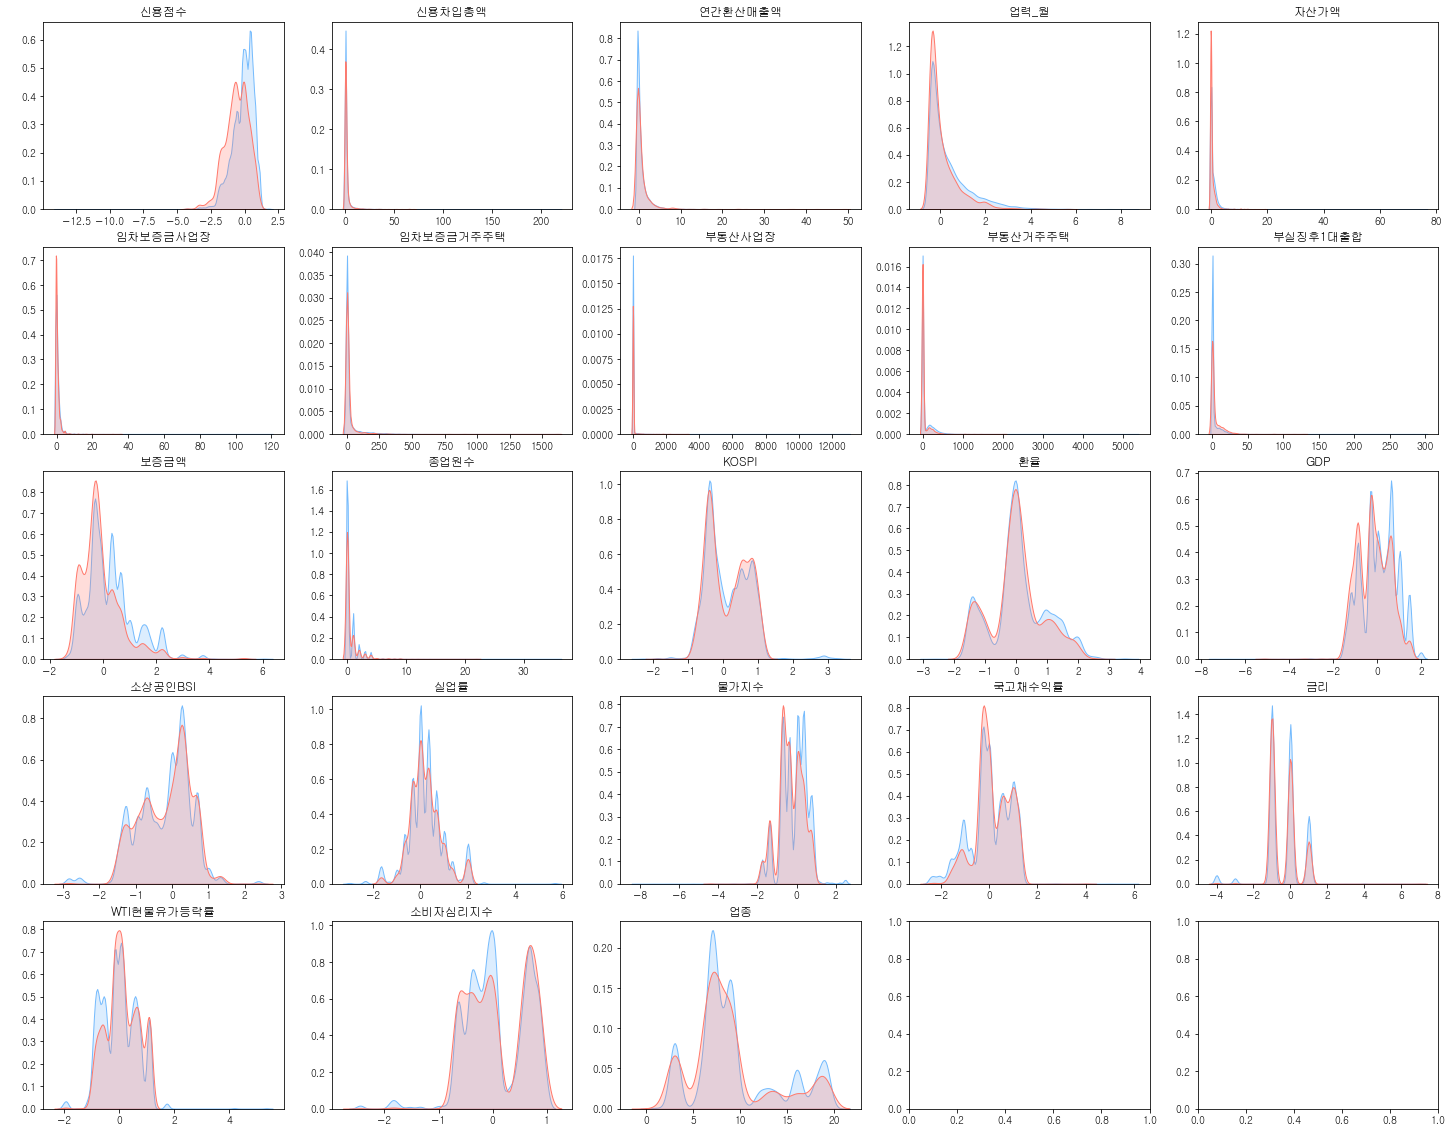

In [16]:
def ori_kdeplot_show(a, b):
    fig, ax = plt.subplots(nrows=5, ncols=5, figsize=(25,20))
    kdeplot_sub_draw(sub_ax=ax[0][0], x=a['CBSCORE'], title='신용점수', size=1, color='xkcd:sky blue')
    kdeplot_sub_draw(sub_ax=ax[0][0], x=b['CBSCORE'], title='신용점수', size=1, color='xkcd:salmon')

    kdeplot_sub_draw(sub_ax=ax[0][1], x=a['CREDITOTAMT'], title='신용차입총액', size=1, color='xkcd:sky blue')
    kdeplot_sub_draw(sub_ax=ax[0][1], x=b['CREDITOTAMT'], title='신용차입총액', size=1, color='xkcd:salmon')


    kdeplot_sub_draw(sub_ax=ax[0][2], x=a['YSALEAMT'], title='연간환산매출액', size=1, color='xkcd:sky blue')
    kdeplot_sub_draw(sub_ax=ax[0][2], x=b['YSALEAMT'], title='연간환산매출액', size=1, color='xkcd:salmon')

    kdeplot_sub_draw(sub_ax=ax[0][3], x=a['ESTMM'], title='업력_월', size=1, color='xkcd:sky blue')
    kdeplot_sub_draw(sub_ax=ax[0][3], x=b['ESTMM'], title='업력_월', size=1, color='xkcd:salmon')
    
    kdeplot_sub_draw(sub_ax=ax[0][4], x=a['ASSETAMT'], title='자산가액', size=1, color='xkcd:sky blue')
    kdeplot_sub_draw(sub_ax=ax[0][4], x=b['ASSETAMT'], title='자산가액', size=1, color='xkcd:salmon')
    
    kdeplot_sub_draw(sub_ax=ax[1][0], x=a['IMSAAMT'], title='임차보증금사업장', size=1, color='xkcd:sky blue')
    kdeplot_sub_draw(sub_ax=ax[1][0], x=b['IMSAAMT'], title='임차보증금사업장', size=1, color='xkcd:salmon' )
    
    kdeplot_sub_draw(sub_ax=ax[1][1], x=a['IMJUAMT'], title='임차보증금거주주택', size=1, color='xkcd:sky blue')
    kdeplot_sub_draw(sub_ax=ax[1][1], x=b['IMJUAMT'], title='임차보증금거주주택', size=1, color='xkcd:salmon')
    
    kdeplot_sub_draw(sub_ax=ax[1][2], x=a['BUSAAMT'], title='부동산사업장', size=1, color='xkcd:sky blue')
    kdeplot_sub_draw(sub_ax=ax[1][2], x=b['BUSAAMT'], title='부동산사업장', size=1, color='xkcd:salmon')
    
    kdeplot_sub_draw(sub_ax=ax[1][3], x=a['BUJUAMT'], title='부동산거주주택', size=1, color='xkcd:sky blue' )
    kdeplot_sub_draw(sub_ax=ax[1][3], x=b['BUJUAMT'], title='부동산거주주택', size=1, color='xkcd:salmon')
    
    kdeplot_sub_draw(sub_ax=ax[1][4], x=a['BU1TOTAMT'], title='부실징후1대출합', size=1, color='xkcd:sky blue')
    kdeplot_sub_draw(sub_ax=ax[1][4], x=b['BU1TOTAMT'], title='부실징후1대출합', size=1, color='xkcd:salmon')
   
    kdeplot_sub_draw(sub_ax=ax[2][0], x=a['GAMT'], title='보증금액', size=1, color='xkcd:sky blue')
    kdeplot_sub_draw(sub_ax=ax[2][0], x=b['GAMT'], title='보증금액', size=1, color='xkcd:salmon')
    
    kdeplot_sub_draw(sub_ax=ax[2][1], x=a['LABORCNT'], title='종업원수', size=1, color='xkcd:sky blue' )
    kdeplot_sub_draw(sub_ax=ax[2][1], x=b['LABORCNT'], title='종업원수', size=1, color='xkcd:salmon')
       
    kdeplot_sub_draw(sub_ax=ax[2][2], x=a['KOSPI'], title='KOSPI', size=1, color='xkcd:sky blue' )
    kdeplot_sub_draw(sub_ax=ax[2][2], x=b['KOSPI'], title='KOSPI', size=1, color='xkcd:salmon')
    
    kdeplot_sub_draw(sub_ax=ax[2][3], x=a['환율'], title='환율', size=1, color='xkcd:sky blue')
    kdeplot_sub_draw(sub_ax=ax[2][3], x=b['환율'], title='환율', size=1, color='xkcd:salmon' )
    
    kdeplot_sub_draw(sub_ax=ax[2][4], x=a['GDP'], title='GDP', size=1, color='xkcd:sky blue')
    kdeplot_sub_draw(sub_ax=ax[2][4], x=b['GDP'], title='GDP', size=1, color='xkcd:salmon')
    
    kdeplot_sub_draw(sub_ax=ax[3][0], x=a['소상공인체감지수'], title='소상공인BSI', size=1, color='xkcd:sky blue')
    kdeplot_sub_draw(sub_ax=ax[3][0], x=b['소상공인체감지수'], title='소상공인BSI', size=1, color='xkcd:salmon' )
    
    kdeplot_sub_draw(sub_ax=ax[3][1], x=a['실업률'], title='실업률', size=1, color='xkcd:sky blue' )
    kdeplot_sub_draw(sub_ax=ax[3][1], x=b['실업률'], title='실업률', size=1, color='xkcd:salmon')
  
    kdeplot_sub_draw(sub_ax=ax[3][2], x=a['물가지수'], title='물가지수', size=1, color='xkcd:sky blue')
    kdeplot_sub_draw(sub_ax=ax[3][2], x=b['물가지수'], title='물가지수', size=1, color='xkcd:salmon' )
    
    kdeplot_sub_draw(sub_ax=ax[3][3], x=a['국고채'], title='국고채수익률', size=1, color='xkcd:sky blue')
    kdeplot_sub_draw(sub_ax=ax[3][3], x=b['국고채'], title='국고채수익률', size=1, color='xkcd:salmon')
    
    kdeplot_sub_draw(sub_ax=ax[3][4], x=a['금리'], title='금리', size=1, color='xkcd:sky blue')
    kdeplot_sub_draw(sub_ax=ax[3][4], x=b['금리'], title='금리', size=1, color='xkcd:salmon')
    
    kdeplot_sub_draw(sub_ax=ax[4][0], x=a['유가등락률'], title='WTI현물유가등락률', size=1, color='xkcd:sky blue')
    kdeplot_sub_draw(sub_ax=ax[4][0], x=b['유가등락률'], title='WTI현물유가등락률', size=1, color='xkcd:salmon' )
    
    kdeplot_sub_draw(sub_ax=ax[4][1], x=a['소비자심리지수'], title='소비자심리지수', size=1, color='xkcd:sky blue' )
    kdeplot_sub_draw(sub_ax=ax[4][1], x=b['소비자심리지수'], title='소비자심리지수', size=1, color='xkcd:salmon' )
    
    kdeplot_sub_draw(sub_ax=ax[4][2], x=a['ONEHOT'], title='업종', size=1, color='xkcd:sky blue')
    kdeplot_sub_draw(sub_ax=ax[4][2], x=b['ONEHOT'], title='업종', size=1, color='xkcd:salmon')

ori_kdeplot_show(data, df_bu)

In [14]:
import pandas as pd
import numpy as np
import seaborn as sns
from patsy import dmatrices
import statsmodels.api as sm;
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [15]:
'''
sns.pairplot(data[['CBSCORE', 'CREDITOTAMT', 'YSALEAMT',
       'ESTMM', 'ASSETAMT', 'IMSAAMT', 'IMJUAMT', 'BUSAAMT', 'BUJUAMT',
       'BU1TOTAMT', 'GAMT', 'LABORCNT',
       'KOSPI', '환율', 'GDP', '소상공인체감지수', '실업률', '물가지수', '국고채', '금리', '유가등락률',
       '소비자심리지수']])
sns.pairplot(df_bu[['CBSCORE', 'CREDITOTAMT', 'YSALEAMT',
       'ESTMM', 'ASSETAMT', 'IMSAAMT', 'IMJUAMT', 'BUSAAMT', 'BUJUAMT',
       'BU1TOTAMT', 'GAMT', 'LABORCNT',
       'KOSPI', '환율', 'GDP', '소상공인체감지수', '실업률', '물가지수', '국고채', '금리', '유가등락률',
       '소비자심리지수']])
'''

"\nsns.pairplot(data[['CBSCORE', 'CREDITOTAMT', 'YSALEAMT',\n       'ESTMM', 'ASSETAMT', 'IMSAAMT', 'IMJUAMT', 'BUSAAMT', 'BUJUAMT',\n       'BU1TOTAMT', 'GAMT', 'LABORCNT',\n       'KOSPI', '환율', 'GDP', '소상공인체감지수', '실업률', '물가지수', '국고채', '금리', '유가등락률',\n       '소비자심리지수']])\nsns.pairplot(df_bu[['CBSCORE', 'CREDITOTAMT', 'YSALEAMT',\n       'ESTMM', 'ASSETAMT', 'IMSAAMT', 'IMJUAMT', 'BUSAAMT', 'BUJUAMT',\n       'BU1TOTAMT', 'GAMT', 'LABORCNT',\n       'KOSPI', '환율', 'GDP', '소상공인체감지수', '실업률', '물가지수', '국고채', '금리', '유가등락률',\n       '소비자심리지수']])\n"

In [16]:
import statsmodels.api as sm

data['intercept'] = 1

lm = sm.OLS(data['ACTCD'], data[[ 'intercept', 'CBSCORE', 'CREDITOTAMT', 'YSALEAMT',
       'ESTMM', 'ASSETAMT', 'IMSAAMT', 'IMJUAMT', 'BUSAAMT', 'BUJUAMT',
       'BU1TOTAMT', 'GAMT', 'GKIND', 'LABORCNT', 'KOSPI', '환율', 'GDP', 
       '소상공인체감지수', '실업률', '물가지수', '국고채', '금리', '유가등락률',
       '소비자심리지수', 'ONEHOT']])
results = lm.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  ACTCD   R-squared:                       0.061
Model:                            OLS   Adj. R-squared:                  0.060
Method:                 Least Squares   F-statistic:                     105.4
Date:                Mon, 29 Nov 2021   Prob (F-statistic):               0.00
Time:                        15:04:36   Log-Likelihood:                -5564.1
No. Observations:               39117   AIC:                         1.118e+04
Df Residuals:                   39092   BIC:                         1.139e+04
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
intercept       2.6689      4.187      0.637      0.524      -5.538      10.876
CBSCORE        -0.0618      0.002    -29.136      0.000      -0.066      -0.058
CREDITOTAMT     0.0014      0.000      3.604      0.000       0.001       0.002
YSALEAMT        0.0044      0.001      4.957      0.000       0.003       0.006
ESTMM          -0.0243      0.002    -14.857      0.000      -0.028      -0.021
ASSETAMT       14.4436     23.727      0.609      0.543     -32.061      60.949
IMSAAMT        -1.7006      2.791     -0.609      0.542      -7.172       3.771
IMJUAMT        -0.0851      0.140     -0.610      0.542      -0.359       0.188
BUSAAMT        -0.0850      0.140     -0.609      0.543      -0.359       0.189
BUJUAMT        -0.0851      0.140     -0.610      0.542      -0.359       0.188
BU1TOTAMT       0.0007      0.000      3.194      0.001       0.000       0.001
GAMT           -0.0082      0.002     -4.039      0.000      -0.012      -0.004
GKIND           0.0048      0.002      2.871      0.004       0.002       0.008
LABORCNT        0.0009      0.001      0.697      0.486      -0.002       0.003
KOSPI          -0.0099      0.006     -1.780      0.075      -0.021       0.001
환율              0.0059      0.003      1.858      0.063      -0.000       0.012
GDP            -0.0320      0.005     -6.880      0.000      -0.041      -0.023
소상공인체감지수        0.0003      0.002      0.121      0.903      -0.004       0.004
실업률             0.0031      0.002      1.418      0.156      -0.001       0.007
물가지수            0.0022      0.005      0.394      0.694      -0.009       0.013
국고채             0.0123      0.004      2.973      0.003       0.004       0.020
금리             -0.0023      0.003     -0.829      0.407      -0.008       0.003
유가등락률           0.0083      0.003      2.846      0.004       0.003       0.014
소비자심리지수         0.0082      0.005      1.552      0.121      -0.002       0.019
ONEHOT         -0.0025      0.000     -7.727      0.000      -0.003      -0.002
==============================================================================
Omnibus:                    19684.734   Durbin-Watson:                   1.719
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            89965.650
Skew:                           2.580   Prob(JB):                         0.00
Kurtosis:                       8.345   Cond. No.                     3.09e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.09e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [70]:
data['intercept'] = 1

lm = sm.OLS(data['ACTCD'], data[[ 'intercept', 'CBSCORE', 'CREDITOTAMT', 'YSALEAMT',
       'ESTMM', 'IMSAAMT', 'IMJUAMT',  'BUJUAMT',
       'BU1TOTAMT', 'GAMT', 'GKIND',  '환율', 'GDP', 
        '국고채', '유가등락률',
        'ONEHOT']]) 
results = lm.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  ACTCD   R-squared:                       0.061
Model:                            OLS   Adj. R-squared:                  0.060
Method:                 Least Squares   F-statistic:                     168.1
Date:                Mon, 29 Nov 2021   Prob (F-statistic):               0.00
Time:                        15:59:32   Log-Likelihood:                -5568.3
No. Observations:               39117   AIC:                         1.117e+04
Df Residuals:                   39101   BIC:                         1.131e+04
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
intercept       0.1210      0.004     33.184      0.000       0.114       0.128
CBSCORE        -0.0621      0.002    -29.323      0.000      -0.066      -0.058
CREDITOTAMT     0.0011      0.000      3.881      0.000       0.001       0.002
YSALEAMT        0.0046      0.001      5.256      0.000       0.003       0.006
ESTMM          -0.0245      0.002    -15.021      0.000      -0.028      -0.021
IMSAAMT        -0.0012      0.001     -1.921      0.055      -0.002    2.46e-05
IMJUAMT        -0.0001   2.16e-05     -5.954      0.000      -0.000   -8.64e-05
BUJUAMT        -0.0001   1.01e-05    -10.416      0.000      -0.000   -8.58e-05
BU1TOTAMT       0.0007      0.000      3.207      0.001       0.000       0.001
GAMT           -0.0080      0.002     -3.971      0.000      -0.012      -0.004
GKIND           0.0046      0.002      2.757      0.006       0.001       0.008
환율              0.0064      0.003      2.544      0.011       0.001       0.011
GDP            -0.0319      0.002    -16.951      0.000      -0.036      -0.028
국고채             0.0115      0.003      3.973      0.000       0.006       0.017
유가등락률           0.0071      0.003      2.820      0.005       0.002       0.012
ONEHOT         -0.0025      0.000     -7.785      0.000      -0.003      -0.002
==============================================================================
Omnibus:                    19693.786   Durbin-Watson:                   1.719
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            90089.052
Skew:                           2.581   Prob(JB):                         0.00
Kurtosis:                       8.351   Cond. No.                         425.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [71]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [72]:
y, X = dmatrices('ACTCD ~ CBSCORE + CREDITOTAMT + YSALEAMT + ESTMM + IMSAAMT + IMJUAMT + BUSAAMT + BUJUAMT + BU1TOTAMT + GAMT + GKIND + LABORCNT  + KOSPI + 환율 + GDP + 소상공인체감지수 + 실업률 + 물가지수 + 국고채 + 금리 + 유가등락률 + 소비자심리지수+ONEHOT', data, return_type = 'dataframe')
vif = pd.DataFrame()
vif["VIF Facotr"] = [variance_inflation_factor(X.values, i ) for i in range(X.shape[1])]
vif["features"] = X.columns 
vif

,VIF Facotr,features
0,8.396655,Intercept
1,1.353055,CBSCORE
2,1.830198,CREDITOTAMT
3,1.307803,YSALEAMT
4,1.163869,ESTMM
5,1.077579,IMSAAMT
6,1.046848,IMJUAMT
7,1.692511,BUSAAMT
8,1.094300,BUJUAMT
9,1.122311,BU1TOTAMT


In [73]:
features = data[['CBSCORE', 'CREDITOTAMT', 'YSALEAMT',
       'ESTMM',  'IMSAAMT', 'IMJUAMT', 'BUSAAMT', 'BUJUAMT',
       'BU1TOTAMT', 'GAMT', 'LABORCNT', 'KOSPI', '환율', 'GDP', 
       '소상공인체감지수', '실업률', '물가지수', '국고채', '금리', '유가등락률',
       '소비자심리지수','ONEHOT']]
act = data['ACTCD']

In [74]:
from sklearn.model_selection import train_test_split

train_x, test_x,train_y, test_y = train_test_split(features, act,
stratify=act,train_size=0.7,test_size=0.3,random_state=1)

print(train_x.shape, test_x.shape, train_y.shape, test_y.shape)

(27381, 22) (11736, 22) (27381,) (11736,)


In [75]:
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm

model = LogisticRegression()
results = model.fit(train_x,train_y)

C:\Users\user\anaconda3\envs\Study_Big\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# 아래부터 데이터 분석 시작

1. 로지스틱 회귀 분석 
SMOTE기법 오버스케일링후 진행

In [78]:
from sklearn.model_selection import train_test_split

train_x, test_x,train_y, test_y = train_test_split(features, act,
stratify=act,train_size=0.7,test_size=0.3,random_state=1)

print(train_x.shape, test_x.shape, train_y.shape, test_y.shape)

(27381, 22) (11736, 22) (27381,) (11736,)


In [79]:
from imblearn.over_sampling import BorderlineSMOTE

bsmote = BorderlineSMOTE(random_state=42)
X_over_trian, Y_over_trian = bsmote.fit_resample(train_x,train_y)

In [80]:
print('SMOTE 적용 후 학습용 피처/레이블 데이터 세트: ', X_over_trian.shape, Y_over_trian.shape)
print('SMOTE 적용 후 레이블 값 분포: \n', pd.Series(Y_over_trian).value_counts())

SMOTE 적용 후 학습용 피처/레이블 데이터 세트:  (49770, 22) (49770,)
SMOTE 적용 후 레이블 값 분포: 
 1.0    24885
0.0    24885
Name: ACTCD, dtype: int64


In [81]:
X_over_test,Y_over_test = bsmote.fit_resample(test_x,test_y)

In [82]:
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm

model = LogisticRegression()
results = model.fit(X_over_trian,Y_over_trian)

C:\Users\user\anaconda3\envs\Study_Big\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [83]:
#로지스틱 모형 적합

model = sm.Logit(Y_over_trian,X_over_trian)
results = model.fit()

Optimization terminated successfully.
         Current function value: 0.557935
         Iterations 6


In [84]:
pred_y = results.predict(test_x)
print(pred_y)

35620    0.444902
13304    0.381639
38803    0.773736
8618     0.406281
36794    0.736633
           ...   
4064     0.448234
7401     0.025789
28336    0.012909
34226    0.126116
22837    0.025474
Length: 11736, dtype: float64


In [85]:
# 임계값 함수

def cut_off(y, threshold) :
    Y = y.copy()  # 대문자 Y를 새로운 변수로 하여 기존의 y값에 영향이 가지 않도록 한다.
    Y[Y>threshold] = 1
    Y[Y<threshold] = 0
    return Y.astype(int)
    
pred_Y = cut_off(pred_y, 0.5)
pred_Y

35620    0
13304    0
38803    1
8618     0
36794    1
        ..
4064     0
7401     0
28336    0
34226    0
22837    0
Length: 11736, dtype: int32

In [86]:
from sklearn.metrics import confusion_matrix
# confusion matrix accuracy(정확도) 계산함수

def acc(cfmat):
    return (cfmat[0,0] + cfmat[1,1])/(cfmat[0,0] + cfmat[1,1] + cfmat[0,1] + cfmat[1,0])

cfmat = confusion_matrix(test_y,pred_Y)

acc(cfmat)

0.7042433537832311

In [87]:
print(cfmat)

[[7550 3116]
 [ 355  715]]


ROC Curve

In [88]:
from sklearn.metrics import precision_score,recall_score,f1_score,roc_auc_score

pr = precision_score(test_y,pred_Y)
print("precision : ",pr)
r = recall_score(test_y,pred_Y)
print("recall : ",r)
f1= f1_score(test_y,pred_Y)
print("f1_score:",f1)
auc_score = roc_auc_score(test_y,pred_y)
print("auc_score : ",auc_score)

precision :  0.18663534325241452
recall :  0.6682242990654206
f1_score: 0.2917771883289125
auc_score :  0.7482730959236354


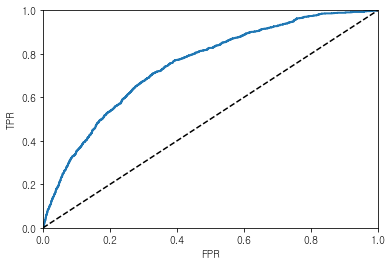

In [89]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 10], [0, 10], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('FPR')
    plt.ylabel('TPR')

from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve

# sklearn에서 ROC 패키지 활용
fpr, tpr, thresholds = roc_curve(test_y,pred_y,pos_label = 1)

# ROC curve
plot_roc_curve(fpr, tpr)
plt.show()